<a href="https://colab.research.google.com/github/oliviachchoi/SDproject-bike-/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%84%9C%EC%B4%88%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

#따릉이 프로젝트 최종본

Why I Chose this Project?
- 학원 마치고 따릉이를 자주 이용하는데, 근처 따릉이 정류소에 따릉이가 없을 때 so sad girl 됨
- 서초구 따릉이 대여소의 각 시간대별 사용량을 예측하여서 자전거의 효과적인 재배치에 도움이 되고자( 행복한 자전거 퇴근길이 되게끔^^) 이 프로젝트를 선청하였다.

- 서울 전역을 하기엔 시간이 부족해서 우선은 서초구에 있는 따릉이를 위주로 분석을 할 것

#사용된 데이터

- 서울시 공공데이터 포털 => 따릉이 대여소 정보
- 서울시 공공데이터 포털 => 따릉이 시간대별 정보
- 서울시 공공데이터 포털 => 미세먼지, 초미세먼지 데이터
- 기상청 => 날씨 데이터

+ Target 변수: 각 대여소 별 이용건수

# Data Preparing

## 따릉이 대여소 정보 데이터

따릉이 대여소 정보 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#따릉이 대여소 정보
station=pd.read_csv('/content/drive/MyDrive/따릉이 project/공공자전거 대여소 정보(21.01.31 기준).csv',encoding='cp949',skiprows=5,header=None)

In [ ]:
#station columns rename
station= station.rename(columns= {0: 'stno', 1: 'stname',2: 'place',3:'detailedplace',4:'Lat',5:'Long',6:'Time',7:'LCD',8:'QR',9:'method'})

In [ ]:
station.head()

,stno,stname,place,detailedplace,Lat,Long,Time,LCD,QR,method
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [ ]:
station.isna().sum()

stno                3
stname              3
place               3
detailedplace       3
Lat               115
Long              115
Time                5
LCD               675
QR               1486
method              3
dtype: int64

Text(0.5, 1.0, 'Station Location')

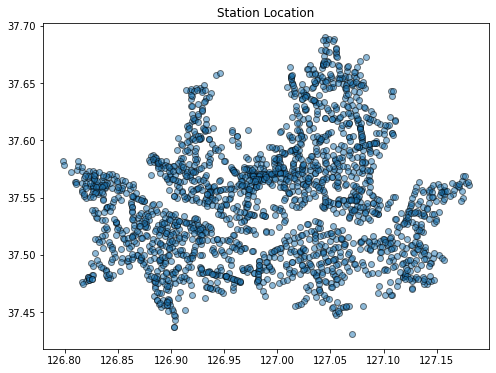

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(station.Long, station.Lat, alpha=0.5, edgecolors='black')
plt.title('Station Location')
#비교적 밀집되어있는 구역과 한산한 구역을 시각적으로 확인 할 수 있다.

In [ ]:
a=pd.DataFrame(station.place.value_counts())
print('Top 3 :')
print(a.head(3))
print('-------------')
print('Bottom 3 :')
print(a.tail(3))

#서초구는 대여소 수 top3안에 든다

Top 3 :
     place
강서구    152
송파구    133
서초구    122
-------------
Bottom 3 :
     place
강북구     59
도봉구     57
금천구     55


In [ ]:
#서초구만 불러오기
station= station[station.place=='서초구']

In [ ]:
station.stname.unique()

array(['본마을 정류소 앞', '청계산입구역 1번출구', '청계산입구역 2번출구', '내곡3단지 어린이공원 앞',
       '언남초등학교 앞', '내곡파출소 뒤 정자', '반포1동 주민센터 앞', '서초구립반포도서관 앞',
       '서초현대4차아파트 201동 맞은편', '고속터미널역 5번출구 앞', '신반포역 2번출구 앞', '반포종합운동장 입구',
       '아크로리버뷰 부지 앞', '고속터미널역 8-1번, 8-2번 출구 사이', '반포본동 주민센터 앞',
       '하나은행 방배동지점 앞', '사당역 12번출구 뒤', '방배래미안 정문 앞', '백석예술대학교 제3캠퍼스 앞',
       '신동아럭스빌아파트 앞', '방배열린문화센터 앞', '뒷벌공원 옆', '로고스교회 맞은 편', '이수역 4번 출구',
       '삼성타운(삼성생명) A동 맞은편', '서초신동아1차아파트 옆', 'KT 서초지사 앞', '서울남부터미널 대합실 입구',
       '교대역 6번출구', '양재전화국 사거리', '양재역 11번 출구 앞', '서울가정법원', '교육개발원입구 교차로',
       '양재초등학교 맞은편', '서울시 품질시험소 앞', '섬들근린공원', '서초리슈빌S 글로벌 앞',
       '우솔초등학교 맞은편', '서초유치원 맞은편', '더케이호텔 입구(양재2)', '하이브랜드 앞',
       '시민의숲역 1번출구 옆', '양재동 꽃시장 입구', '하나로클럽 양재점 맞은편', '구룡사 삼거리',
       '잠원역 3번-4번 출구사이', '한신16차아파트 119동 앞', '바우뫼문화복지회관', '이수역 1번출구',
       '이수고가차도 남단', '서초역 3번출구', '서초4동주민센터', '주홍교 하부', '서초포레스타 7단지',
       '내방역 8번출구 앞', '교대입구 교차로', '일동제약 사거리', '양재시민의숲역 3번출구', '염곡치안센터 건너편',
       '영동1교 (양재천근린공원)', '길마중4교 하부', '

In [ ]:
station['stno']= station.stno.astype(int)

In [ ]:
list_s= ['stno','stname','place']
station= station[list_s]

In [ ]:
#122개의 unique station
len(station.stno.unique())

122

In [ ]:
station.isna().sum()

stno      0
stname    0
place     0
dtype: int64

In [ ]:
station

,stno,stname,place
1697,2201,본마을 정류소 앞,서초구
1698,2202,청계산입구역 1번출구,서초구
1699,2203,청계산입구역 2번출구,서초구
1700,2205,내곡3단지 어린이공원 앞,서초구
1701,2206,언남초등학교 앞,서초구
...,...,...,...
1814,2545,국립중앙도서관(국제회의장옆),서초구
1815,2547,포드서초서비스센터앞,서초구
1816,2548,반포1동 자율방범초소 옆,서초구
1817,2549,LH 서초 4단지 403동,서초구


## 따릉이 시간별 데이터

In [ ]:
df1_5=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_19.12_20.056.csv',encoding='cp949')
df_6=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.06.csv',encoding='cp949')
df_7=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.07.csv',encoding='cp949')
df_8=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.08.csv',encoding='cp949')
df_9=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.09.csv',encoding='cp949')
df_10=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.10.csv',encoding='cp949')
df_11=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.11.csv',encoding='cp949')
df_12=pd.read_csv('/content/drive/MyDrive/따릉이 project/시간대별 데이터/공공자전거 이용정보(시간대별)_20.12.csv',encoding='cp949')

In [ ]:
#concat이 error나서 append로 데이터 병합시킴
df=df1_5.append(df_6)
df=df.append(df_7)
df=df.append(df_8)
df=df.append(df_9)
df=df.append(df_10)
df=df.append(df_11)
df=df.append(df_12)

In [ ]:
df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2019-12-01,0,504,504. 신자초교입구교차로,정기권,NaN,~10대,3,74.84,0.67,2880.0,17
1,2019-12-01,0,1029,1029. 롯데 시네마,정기권,NaN,~10대,1,246.71,2.06,8900.0,45
2,2019-12-01,0,1153,"1153. 발산역 1번, 9번 인근 대여소",정기권,NaN,~10대,1,25.60,0.23,1010.0,12
3,2019-12-01,0,512,512. 뚝섬역 1번 출구 옆,정기권,NaN,~10대,1,78.59,0.73,3150.0,17
4,2019-12-01,0,1528,1528. 삼각산동 주민센터,정기권,NaN,~10대,1,26.15,0.22,930.0,5


In [ ]:
list_need= ['대여일자','대여시간','대여소번호','이용건수']
df= df[list_need]

In [ ]:
df.head()

,대여일자,대여시간,대여소번호,이용건수
0,2019-12-01,0,504,3
1,2019-12-01,0,1029,1
2,2019-12-01,0,1153,1
3,2019-12-01,0,512,1
4,2019-12-01,0,1528,1


In [ ]:
station.head()

,stno,stname,place
1697,2201,본마을 정류소 앞,서초구
1698,2202,청계산입구역 1번출구,서초구
1699,2203,청계산입구역 2번출구,서초구
1700,2205,내곡3단지 어린이공원 앞,서초구
1701,2206,언남초등학교 앞,서초구


### station 데이터와 df 데이터의 merge

In [ ]:
merge_inner= pd.merge(df, station, how='inner',left_on='대여소번호',right_on='stno')

In [ ]:
data=merge_inner.copy()
data= data.rename(columns={'대여일자':'date','대여시간':'time','이용건수':'num'})

In [ ]:
data.drop('대여소번호',axis=1, inplace=True)

In [ ]:
data

,date,time,num,stno,stname,place
0,2019-12-01,0,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구
1,2019-12-01,0,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구
2,2019-12-01,0,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구
3,2019-12-01,1,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구
4,2019-12-01,1,3,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구
...,...,...,...,...,...,...
790895,2020-11-17,13,1,2543,경문고교 사거리,서초구
790896,2020-11-17,13,1,2543,경문고교 사거리,서초구
790897,2020-11-19,19,1,2543,경문고교 사거리,서초구
790898,2020-11-20,17,1,2543,경문고교 사거리,서초구


### 대여일자 feature engineering

In [ ]:
import datetime
#year, month, day 변수
data['date']= pd.to_datetime(data.date)
data['year']= data['date'].dt.strftime('%Y')
data['month']=data['date'].dt.strftime('%m')
data['day']=data['date'].dt.strftime('%d')

#to int type
data['year']=data['year'].astype(int)
data['month']=data['month'].astype(int)
data['day']=data['day'].astype(int)

#2020 data만 추출
data=data[data['year']==2020]
data.drop('date',axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data

,time,num,stno,stname,place,year,month,day
1362,1,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,2020,1,1
1363,1,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,2020,1,1
1364,2,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,2020,1,1
1365,2,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,2020,1,1
1366,2,1,2219,"고속터미널역 8-1번, 8-2번 출구 사이",서초구,2020,1,1
...,...,...,...,...,...,...,...,...
790895,13,1,2543,경문고교 사거리,서초구,2020,11,17
790896,13,1,2543,경문고교 사거리,서초구,2020,11,17
790897,19,1,2543,경문고교 사거리,서초구,2020,11,19
790898,17,1,2543,경문고교 사거리,서초구,2020,11,20


In [ ]:
#groupby => 빌린 갯수만 sum으로 넣음
data=data.groupby(by=['year','month','day','time','stno','stname','place'], as_index=False).sum()

In [ ]:
list_ord=['year','month','day','time','place','stno','stname','num']
data=data[list_ord]

In [ ]:
data

,year,month,day,time,place,stno,stname,num
0,2020,1,1,0,서초구,2213,고속터미널역 5번출구 앞,1
1,2020,1,1,0,서초구,2222,사당역 12번출구 뒤,1
2,2020,1,1,0,서초구,2251,더케이호텔 입구(양재2),1
3,2020,1,1,0,서초구,2256,양재동 꽃시장 입구,1
4,2020,1,1,0,서초구,2268,서초4동주민센터,2
...,...,...,...,...,...,...,...,...
359515,2020,12,31,23,서초구,2294,두상빌딩 앞,1
359516,2020,12,31,23,서초구,2502,서초역1번출구 앞,1
359517,2020,12,31,23,서초구,2508,양재이스타빌 앞,1
359518,2020,12,31,23,서초구,2524,반포쇼핑타운 8동 앞,1


In [ ]:
data.stno.isna().sum()

0

In [ ]:
len(data.stno.unique())
#서초구엔 약 122개의 대여소가 있다. 

122

## 미세먼지 데이터

### 데이터 불러오기

In [ ]:
dust1=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202001.csv',encoding='cp949')
dust2=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202002.csv',encoding='cp949')
dust3=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202003.csv',encoding='cp949')
dust4=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202004.csv',encoding='cp949')
dust5=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202005.csv',encoding='cp949')
dust6=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202006.csv',encoding='cp949')
dust7=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202007.csv',encoding='cp949')
dust8=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202008.csv',encoding='cp949')
dust9=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202009.csv',encoding='cp949')
dust10=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202010.csv',encoding='cp949')
dust11=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202011.csv',encoding='cp949')
dust12=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/AIR_HOUR_202012.csv',encoding='cp949')

dust_info=pd.read_csv('/content/drive/MyDrive/따릉이 project/미세먼지/서울특별시 대기오염 측정소 정보.csv',encoding='cp949')

In [ ]:
#측정항목코드= 8미세먼지, 9=초미세먼지
list_1= ['측정일시','측정소 코드','측정항목 코드','평균값']

dust1=dust1[list_1]
dust1.head()
dust2= dust2[list_1]
dust3=dust3[list_1]
dust4=dust4[list_1]
dust4=dust4[list_1]
dust5=dust5[list_1]
dust6=dust6[list_1]
dust7=dust7[list_1]
dust8=dust8[list_1]
dust9=dust9[list_1]
dust10=dust10[list_1]
dust11=dust11[list_1]
dust12=dust12[list_1]

In [ ]:
dust_df= dust1.append(dust2)
dust_df=dust_df.append(dust3)
dust_df=dust_df.append(dust4)
dust_df=dust_df.append(dust5)
dust_df=dust_df.append(dust6)
dust_df=dust_df.append(dust7)
dust_df=dust_df.append(dust8)
dust_df=dust_df.append(dust9)
dust_df=dust_df.append(dust10)
dust_df=dust_df.append(dust11)
dust_df=dust_df.append(dust12)

In [ ]:
dust_df

,측정일시,측정소 코드,측정항목 코드,평균값
0,20200131230000,117,1,0.005
1,20200131230000,104,9,35.000
2,20200131230000,104,8,47.000
3,20200131230000,101,3,0.048
4,20200131230000,101,1,0.003
...,...,...,...,...
111595,20201201000000,124,3,0.046
111596,20201201000000,105,9,15.000
111597,20201201000000,119,1,0.004
111598,20201201000000,107,9,22.000


In [ ]:
dust_info

,측정소 코드,측정소 이름,측정소 주소,표시 순서,공인코드
0,101,종로구,서울 종로구 종로35가길 19 종로56가 동 주민센터,1,111123
1,102,중구,서울 중구 덕수궁길 15 시청서소문별관 3동,2,111121
2,103,용산구,서울 용산구 한남대로 136 서울특별시중부기술교육원,3,111131
3,104,은평구,서울 은평구 진흥로 215 (한국환경산업기술원 온실동2층 ),4,111181
4,105,서대문구,서울 서대문구 세검정로4길 32(홍제3동 주민센터),5,111191
5,106,마포구,서울 마포구 포은로 6길 10 망원1동주민센터 옥상,6,111201
6,107,성동구,서울 성동구 뚝섬로3길 18 성수1가1동주민센터,7,111142
7,108,광진구,서울특별시 광진구 광나루로 571 구의 아리수정수센터,8,111141
8,109,동대문구,서울 동대문구 천호대로13길 43 용두초등학교,9,111152
9,110,중랑구,서울 중랑구 용마산로 369 건강가정지원센터,10,111151


In [ ]:
dust_info['측정소 이름'].unique()
dust_info=dust_info[dust_info['측정소 이름']=='서초구']

In [ ]:
#필요한 column만 추출
dust_info= dust_info[['측정소 코드','측정소 이름']]

In [ ]:
dust_info

,측정소 코드,측정소 이름
21,122,서초구


###  dust_info 랑 dust_df 랑 merge

In [ ]:
merge_dust= pd.merge(dust_info, dust_df, how='inner',left_on='측정소 코드',right_on='측정소 코드')

In [ ]:
merge_dust['측정소 이름'].unique() #서초구 데이터만 남은 것을 확인 할 수 있다
merge_dust

,측정소 코드,측정소 이름,측정일시,측정항목 코드,평균값
0,122,서초구,20200131230000,5,0.400
1,122,서초구,20200131230000,6,0.028
2,122,서초구,20200131230000,8,49.000
3,122,서초구,20200131230000,9,34.000
4,122,서초구,20200131230000,3,0.034
...,...,...,...,...,...
52543,122,서초구,20201201000000,8,36.000
52544,122,서초구,20201201000000,3,0.017
52545,122,서초구,20201201000000,9,25.000
52546,122,서초구,20201201000000,5,0.500


In [ ]:
merge_dust['측정항목 코드'].unique() 

array([5, 6, 8, 9, 3, 1])

### 미세먼지, 초미세먼지 행을 따로 column으로 빼서 merge 

측정항목 코드 8 = 미세먼지
측정항목 코드 9 = 초미세먼지

In [ ]:
merge_dust=merge_dust[(merge_dust['측정항목 코드']==8) | (merge_dust['측정항목 코드']==9)]

In [ ]:
dust_place=merge_dust[['측정소 코드','측정소 이름','측정일시']]
dust_dust8=merge_dust[merge_dust['측정항목 코드']==8]
dust_dust9=merge_dust[merge_dust['측정항목 코드']==9]

In [ ]:
dust_dust8

,측정소 코드,측정소 이름,측정일시,측정항목 코드,평균값
2,122,서초구,20200131230000,8,49.0
10,122,서초구,20200131220000,8,49.0
13,122,서초구,20200131210000,8,47.0
22,122,서초구,20200131200000,8,47.0
27,122,서초구,20200131190000,8,48.0
...,...,...,...,...,...
52522,122,서초구,20201201040000,8,26.0
52528,122,서초구,20201201030000,8,30.0
52530,122,서초구,20201201020000,8,27.0
52541,122,서초구,20201201010000,8,34.0


In [ ]:
dust_place

,측정소 코드,측정소 이름,측정일시
2,122,서초구,20200131230000
3,122,서초구,20200131230000
10,122,서초구,20200131220000
11,122,서초구,20200131220000
12,122,서초구,20200131210000
...,...,...,...
52531,122,서초구,20201201020000
52540,122,서초구,20201201010000
52541,122,서초구,20201201010000
52543,122,서초구,20201201000000


In [ ]:
dust_dust8.drop('측정항목 코드', axis=1, inplace=True)
dust_dust9.drop('측정항목 코드',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#8,9를 제외한 중복값 다 제거
dust_place=dust_place.drop_duplicates(keep='first')

In [ ]:
dust_dust8=dust_dust8.rename(columns={'평균값':'미세먼지 평균'})
dust_dust9=dust_dust9.rename(columns={'평균값':'초미세먼지 평균'})

In [ ]:
#merge
dust_final= pd.merge(left=dust_place, right=dust_dust8, how='inner',on=['측정소 코드','측정소 이름','측정일시'])
dust_final= pd.merge(left=dust_final, right=dust_dust9, how='inner',on=['측정소 코드','측정소 이름','측정일시'])

In [ ]:
dust_final.head()

,측정소 코드,측정소 이름,측정일시,미세먼지 평균,초미세먼지 평균
0,122,서초구,20200131230000,49.0,34.0
1,122,서초구,20200131220000,49.0,31.0
2,122,서초구,20200131210000,47.0,985.0
3,122,서초구,20200131200000,47.0,31.0
4,122,서초구,20200131190000,48.0,31.0


### 측정일시를 feature engineering
year, month, day, hour 로 변형해서 위의 최종 데이터랑 병합 할 예정

In [ ]:
dust_final['측정일시']= dust_final['측정일시'].astype(str)

In [ ]:
dust_final['year']=dust_final['측정일시'].str.slice(start=0, stop=4)
dust_final['month']=dust_final['측정일시'].str.slice(start=4, stop=6)
dust_final['day']=dust_final['측정일시'].str.slice(start=6, stop=8)
dust_final['hour']=dust_final['측정일시'].str.slice(start=8, stop=10)

dust_final.drop('측정일시',axis=1,inplace=True)
dust_final.drop('측정소 코드', axis=1, inplace=True)

In [ ]:
dust_final['year']= dust_final['year'].astype(int)
dust_final['month']= dust_final['month'].astype(int)
dust_final['day']= dust_final['day'].astype(int)
dust_final['hour']= dust_final['hour'].astype(int)

In [ ]:
dust_final

,측정소 이름,미세먼지 평균,초미세먼지 평균,year,month,day,hour
0,서초구,49.0,34.0,2020,1,31,23
1,서초구,49.0,31.0,2020,1,31,22
2,서초구,47.0,985.0,2020,1,31,21
3,서초구,47.0,31.0,2020,1,31,20
4,서초구,48.0,31.0,2020,1,31,19
...,...,...,...,...,...,...,...
8753,서초구,26.0,17.0,2020,12,1,4
8754,서초구,30.0,18.0,2020,12,1,3
8755,서초구,27.0,16.0,2020,12,1,2
8756,서초구,34.0,20.0,2020,12,1,1


## 서초구 날씨 데이터

강수, 기온, 습도, 풍속 데이터를 불러옴

In [ ]:
df_rain= pd.read_csv('/content/drive/MyDrive/따릉이 project/기상청/서초4동_강수_202001_202012.csv',encoding='cp949')
df_temp= pd.read_csv('/content/drive/MyDrive/따릉이 project/기상청/서초4동_기온_202001_202012.csv',encoding='cp949')
df_hum= pd.read_csv('/content/drive/MyDrive/따릉이 project/기상청/서초4동_습도_202001_202012.csv',encoding='cp949')
df_wind= pd.read_csv('/content/drive/MyDrive/따릉이 project/기상청/서초4동_풍속_202001_202012.csv',encoding='cp949')

In [ ]:
df_rain.columns

Index(['date', 'hour', 'value', 'month'], dtype='object')

In [ ]:
# df_rain[' format: day']
# df_rain['value location:61_125 Start : 20200101 ']
df_rain= df_rain.rename(columns= {' format: day': 'date','value location:61_125 Start : 20200101 ': 'val' })
df_temp= df_temp.rename(columns= {' format: day': 'date','value location:61_125 Start : 20200101 ': 'val' })
df_hum= df_hum.rename(columns= {' format: day': 'date','value location:61_125 Start : 20200101 ': 'val' })
df_wind= df_wind.rename(columns= {' format: day': 'date','value location:61_125 Start : 20200101 ': 'val' })

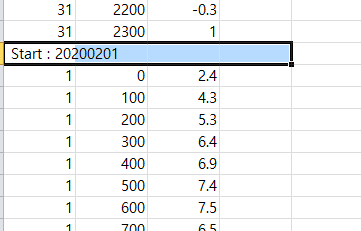

na값이 있는 이유와 na값 처리

In [ ]:
df_rain.isna().sum()

date      0
hour     11
value    11
month    11
dtype: int64

In [ ]:
df_rain[df_rain.hour.isna()]

,date,hour,value,month
744,Start : 20200201,NaN,NaN,NaN
1441,Start : 20200301,NaN,NaN,NaN
2186,Start : 20200401,NaN,NaN,NaN
2907,Start : 20200501,NaN,NaN,NaN
3652,Start : 20200601,NaN,NaN,NaN
4373,Start : 20200701,NaN,NaN,NaN
5118,Start : 20200801,NaN,NaN,NaN
5863,Start : 20200901,NaN,NaN,NaN
6584,Start : 20201001,NaN,NaN,NaN
7329,Start : 20201101,NaN,NaN,NaN


In [ ]:
#dropping the na val
df_rain.dropna(inplace=True)
df_temp.dropna(inplace=True)
df_hum.dropna(inplace=True)
df_wind.dropna(inplace=True)

In [ ]:
def to_int(df, col):
  df[col]= df[col].astype(int)
#hour
to_int(df_rain,'hour')
to_int(df_rain,'month')
#temp
to_int(df_temp,'hour')
to_int(df_temp,'month')
#hum
to_int(df_hum,'hour')
to_int(df_hum,'month')
#wind
to_int(df_wind,'hour')
to_int(df_wind,'month')

In [ ]:
df_rain

,date,hour,value,month
0,1,0,0.0,1
1,1,100,0.0,1
2,1,200,0.0,1
3,1,300,0.0,1
4,1,400,0.0,1
...,...,...,...,...
8790,31,1900,0.0,12
8791,31,2000,0.0,12
8792,31,2100,0.0,12
8793,31,2200,0.0,12


In [ ]:
def replaced(df):
  df['hour'].replace({0:0,100:1,200:2,300:3,400:4,500:5,600:6,700:7,800:8,900:9,1000:10,1100:11,1200:12,
                      1300:13,1400:14,1500:15,1600:16,1700:17,1800:18,1900:19,2000:20,2100:21,2200:22,2300:23},inplace=True)

replaced(df_rain)
replaced(df_temp)
replaced(df_hum)
replaced(df_wind)

In [ ]:
df_wind.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

### Rename columns then Merge all of them into weather data

In [ ]:
df_rain= df_rain.rename(columns= {'value': 'rainval'})
df_temp= df_temp.rename(columns= {'value': 'tempval'})
df_hum= df_hum.rename(columns= {'value': 'humval' })
df_wind= df_wind.rename(columns= {'value': 'windval' })

In [ ]:
df_wind

,date,hour,windval,month
0,1,0,1.4,1
1,1,1,1.1,1
2,1,2,1.4,1
3,1,3,0.9,1
4,1,4,0.9,1
...,...,...,...,...
8790,31,19,0.8,12
8791,31,20,0.9,12
8792,31,21,0.6,12
8793,31,22,0.7,12


In [ ]:
merge_weather1= pd.merge(df_rain, df_temp, how='inner',on=['month','date','hour'])
merge_weather2= pd.merge(df_hum, df_wind, how='inner',on=['month','date','hour'])

In [ ]:
weather= pd.merge(merge_weather1, merge_weather2, how='inner',on=['month','date','hour'])

In [ ]:
weather['year']=2020

In [ ]:
order=['year','month','date','hour','rainval','tempval','humval','windval']
weather=weather[order]
weather

,year,month,date,hour,rainval,tempval,humval,windval
0,2020,1,1,0,0.0,-3.7,78.0,1.4
1,2020,1,1,1,0.0,-3.2,84.0,1.1
2,2020,1,1,2,0.0,-2.1,77.0,1.4
3,2020,1,1,3,0.0,-0.9,74.0,0.9
4,2020,1,1,4,0.0,0.0,69.0,0.9
...,...,...,...,...,...,...,...,...
8779,2020,12,31,19,0.0,-9.8,68.0,0.8
8780,2020,12,31,20,0.0,-9.4,72.0,0.9
8781,2020,12,31,21,0.0,-8.4,67.0,0.6
8782,2020,12,31,22,0.0,-8.6,72.0,0.7


# 최종 데이터 셋: data, dust_final,weather

## 데이터 합치기

그냥 내일 날씨 + 미세먼지 데이터 합해서 
na값 처리 해주고

나머지 따릉이 데이터랑 합쳐야겟다.

In [ ]:
data= data.rename(columns={'time':'hour'})
weather=weather.rename(columns={'date':'day'})

In [ ]:
data.head()

,year,month,day,hour,place,stno,stname,num
0,2020,1,1,0,서초구,2213,고속터미널역 5번출구 앞,1
1,2020,1,1,0,서초구,2222,사당역 12번출구 뒤,1
2,2020,1,1,0,서초구,2251,더케이호텔 입구(양재2),1
3,2020,1,1,0,서초구,2256,양재동 꽃시장 입구,1
4,2020,1,1,0,서초구,2268,서초4동주민센터,2


In [ ]:
dust_final.head()

,측정소 이름,미세먼지 평균,초미세먼지 평균,year,month,day,hour
0,서초구,49.0,34.0,2020,1,31,23
1,서초구,49.0,31.0,2020,1,31,22
2,서초구,47.0,985.0,2020,1,31,21
3,서초구,47.0,31.0,2020,1,31,20
4,서초구,48.0,31.0,2020,1,31,19


In [ ]:
weather.head()

,year,month,day,hour,rainval,tempval,humval,windval
0,2020,1,1,0,0.0,-3.7,78.0,1.4
1,2020,1,1,1,0.0,-3.2,84.0,1.1
2,2020,1,1,2,0.0,-2.1,77.0,1.4
3,2020,1,1,3,0.0,-0.9,74.0,0.9
4,2020,1,1,4,0.0,0.0,69.0,0.9


In [ ]:
weather['day']=weather.day.astype(int)

In [ ]:
all_df= pd.merge(data, dust_final,how='outer',on=['year','month','day','hour'] )
all_df=pd.merge(all_df, weather, how='outer',on=['year','month','day','hour'])

all_df.drop('측정소 이름',axis=1, inplace=True)

세 데이터셋을 all_df로 merge(outer)로 하니까 
결측치가 보인다. 따라서 날씨 + 미세먼지를 해서 미세먼지의 결측치를 채워주고,
merge된 데이터셋에 따릉이 데이터셋을 merge 할 에정이다. 

## 미세먼지 데이터와 날씨 데이터 merge

위에서 확인 했듯이, 미세먼지 데이터가 
- 2월 21,22
- 7월 3,4 

일 데이터가 missing

=> 날씨 데이터와 merge 해서 결측치 대체

In [ ]:
dust_final.head()

,측정소 이름,미세먼지 평균,초미세먼지 평균,year,month,day,hour
0,서초구,49.0,34.0,2020,1,31,23
1,서초구,49.0,31.0,2020,1,31,22
2,서초구,47.0,985.0,2020,1,31,21
3,서초구,47.0,31.0,2020,1,31,20
4,서초구,48.0,31.0,2020,1,31,19


In [ ]:
weather.head()

,year,month,day,hour,rainval,tempval,humval,windval
0,2020,1,1,0,0.0,-3.7,78.0,1.4
1,2020,1,1,1,0.0,-3.2,84.0,1.1
2,2020,1,1,2,0.0,-2.1,77.0,1.4
3,2020,1,1,3,0.0,-0.9,74.0,0.9
4,2020,1,1,4,0.0,0.0,69.0,0.9


In [ ]:
dust_weather= pd.merge(dust_final, weather, how='outer', on=['year','month','day','hour'])

In [ ]:
dust_weather.shape

(8784, 11)

In [ ]:
dust_weather.head()

,측정소 이름,미세먼지 평균,초미세먼지 평균,year,month,day,hour,rainval,tempval,humval,windval
0,서초구,49.0,34.0,2020,1,31,23,0.0,1.0,79.0,0.9
1,서초구,49.0,31.0,2020,1,31,22,0.0,-0.3,86.0,0.9
2,서초구,47.0,985.0,2020,1,31,21,0.0,-1.1,95.0,0.9
3,서초구,47.0,31.0,2020,1,31,20,0.0,-0.6,92.0,0.9
4,서초구,48.0,31.0,2020,1,31,19,0.0,-0.8,96.0,0.8


In [ ]:
dust_weather.isna().sum()
#날씨 데이터는 missing값이 없지만 미세먼지 데이터는 missing이 있기 때문에 이 값 처리 우선 해 줄 것.

측정소 이름      26
미세먼지 평균     26
초미세먼지 평균    26
year         0
month        0
day          0
hour         0
rainval      0
tempval      0
humval       0
windval      0
dtype: int64

In [ ]:
print(dust_weather[dust_weather['미세먼지 평균'].isna()].shape)
print(dust_weather[dust_weather['초미세먼지 평균'].isna()].shape)
#26 rows of missing val

(26, 11)
(26, 11)


In [ ]:
dust_weather[dust_weather['미세먼지 평균'].isna()]

,측정소 이름,미세먼지 평균,초미세먼지 평균,year,month,day,hour,rainval,tempval,humval,windval
8758,NaN,NaN,NaN,2020,2,21,18,0.0,5.100000,86.0,1.8
8759,NaN,NaN,NaN,2020,2,21,19,0.0,4.700000,84.0,1.3
8760,NaN,NaN,NaN,2020,2,21,20,0.0,4.700000,78.0,1.3
8761,NaN,NaN,NaN,2020,2,21,21,0.0,4.400000,77.0,1.3
8762,NaN,NaN,NaN,2020,2,21,22,0.0,4.700000,75.0,1.5
8763,NaN,NaN,NaN,2020,2,21,23,0.0,5.300000,77.0,1.4
8764,NaN,NaN,NaN,2020,2,22,0,0.0,6.200000,68.0,2.2
8765,NaN,NaN,NaN,2020,2,22,1,0.0,6.900000,55.0,2.5
8766,NaN,NaN,NaN,2020,2,22,2,0.0,7.800000,47.0,2.9
8767,NaN,NaN,NaN,2020,2,22,3,0.0,8.300000,34.0,3.1


### dust_weather DF의 결측치 처리

26개의 결측치가 보인다. 각 날의 값이 있는 시간대의 평균을 내서 
결측치를 채울것이다. 

In [ ]:
#우선 서초구는 동일하니까
dust_weather['측정소 이름'].fillna('서초구',inplace=True)

In [ ]:
#2월 21데이터의 na값이 아닌 것들의 미세먼지/ 초미세먼지 평균을 볼 것
print(round(dust_weather[(dust_weather.month==2)&(dust_weather.day==21)&(dust_weather['미세먼지 평균'].notna())]['미세먼지 평균'].mean()))
print(round(dust_weather[(dust_weather.month==2)&(dust_weather.day==21)&(dust_weather['미세먼지 평균'].notna())]['초미세먼지 평균'].mean()))

81
55


In [ ]:
#month, day로 그룹 한 것의 mean값으로 대체 해 주기로 함.
dust_weather['미세먼지 평균']= dust_weather['미세먼지 평균'].fillna(dust_weather.groupby(['month','day'])['미세먼지 평균'].transform('mean'))
dust_weather['초미세먼지 평균']= dust_weather['초미세먼지 평균'].fillna(dust_weather.groupby(['month','day'])['초미세먼지 평균'].transform('mean'))

In [ ]:
dust_weather.isna().sum()

측정소 이름      0
미세먼지 평균     0
초미세먼지 평균    0
year        0
month       0
day         0
hour        0
rainval     0
tempval     0
humval      0
windval     0
dtype: int64

### dust 이상치 처리

0보다 작은 값을 가질 순 없음 => air korea

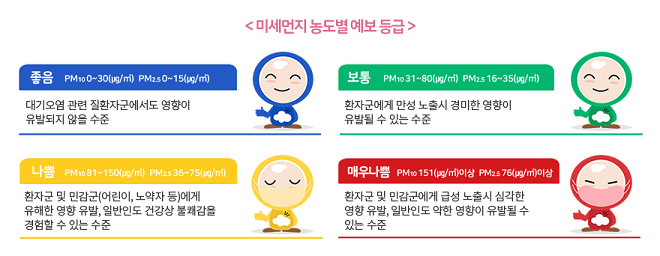

-9999.0 이 될 수 없기 때문에 사전 처리를 해준다.

In [ ]:
dust_weather[dust_weather['미세먼지 평균']<0]['미세먼지 평균'].value_counts()

-9999.0    8
-6.0       7
-4.0       4
-5.0       3
-3.0       2
-1.0       1
-2.0       1
Name: 미세먼지 평균, dtype: int64

In [ ]:
#0보다 작은 미세먼지 평균을 nan값으로 바꿈
dust_weather['미세먼지 평균']= dust_weather['미세먼지 평균'].replace(-9999.0,np.nan)
dust_weather['미세먼지 평균']= dust_weather['미세먼지 평균'].replace([-1.0,-2.0,-3.0,-4.0,-5.0,-6.0],np.nan)

In [ ]:
dust_weather[dust_weather['초미세먼지 평균']<0]['초미세먼지 평균'].value_counts()

-9999.0    8
-2.0       1
-15.0      1
Name: 초미세먼지 평균, dtype: int64

In [ ]:
#초미세먼지 평균도 바꿈
dust_weather['초미세먼지 평균']= dust_weather['초미세먼지 평균'].replace([-9999.0,-2.0,-15.0],np.nan)

In [ ]:
#month, day로 그룹 한 것의 mean값으로 대체 해 주기로 함.
dust_weather['미세먼지 평균']= dust_weather['미세먼지 평균'].fillna(dust_weather.groupby(['month','day'])['미세먼지 평균'].transform('mean'))
dust_weather['초미세먼지 평균']= dust_weather['초미세먼지 평균'].fillna(dust_weather.groupby(['month','day'])['초미세먼지 평균'].transform('mean'))

In [ ]:
dust_weather.isna().sum()

측정소 이름      0
미세먼지 평균     0
초미세먼지 평균    0
year        0
month       0
day         0
hour        0
rainval     0
tempval     0
humval      0
windval     0
dtype: int64

In [ ]:
dust_weather[(dust_weather['미세먼지 평균']<0)|(dust_weather['초미세먼지 평균']<0)]
#미세먼지 이상치 까지 제거 완료@_@

,측정소 이름,미세먼지 평균,초미세먼지 평균,year,month,day,hour,rainval,tempval,humval,windval


### data(따릉이 정보)와 merge

In [ ]:
data

,year,month,day,hour,place,stno,stname,num
0,2020,1,1,0,서초구,2213,고속터미널역 5번출구 앞,1
1,2020,1,1,0,서초구,2222,사당역 12번출구 뒤,1
2,2020,1,1,0,서초구,2251,더케이호텔 입구(양재2),1
3,2020,1,1,0,서초구,2256,양재동 꽃시장 입구,1
4,2020,1,1,0,서초구,2268,서초4동주민센터,2
...,...,...,...,...,...,...,...,...
359515,2020,12,31,23,서초구,2294,두상빌딩 앞,1
359516,2020,12,31,23,서초구,2502,서초역1번출구 앞,1
359517,2020,12,31,23,서초구,2508,양재이스타빌 앞,1
359518,2020,12,31,23,서초구,2524,반포쇼핑타운 8동 앞,1


In [ ]:
dust_weather

,측정소 이름,미세먼지 평균,초미세먼지 평균,year,month,day,hour,rainval,tempval,humval,windval
0,서초구,49.000000,34.000000,2020,1,31,23,0.0,1.000000,79.0,0.9
1,서초구,49.000000,31.000000,2020,1,31,22,0.0,-0.300000,86.0,0.9
2,서초구,47.000000,985.000000,2020,1,31,21,0.0,-1.100000,95.0,0.9
3,서초구,47.000000,31.000000,2020,1,31,20,0.0,-0.600000,92.0,0.9
4,서초구,48.000000,31.000000,2020,1,31,19,0.0,-0.800000,96.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...
8779,서초구,25.263158,12.421053,2020,7,4,0,0.0,25.400000,47.0,1.4
8780,서초구,25.263158,12.421053,2020,7,4,1,0.0,27.100000,45.0,1.3
8781,서초구,25.263158,12.421053,2020,7,4,2,0.0,26.799999,46.0,2.2
8782,서초구,25.263158,12.421053,2020,7,4,3,0.0,27.700001,41.0,1.6


In [ ]:
final_data= pd.merge(data, dust_weather, on=['year','month','day','hour'])

In [ ]:
#모든 데이터가 서초구이기 때문에 서초구 column은 필요 없음
final_data.drop('측정소 이름', axis=1, inplace=True)
final_data.drop('place',inplace=True, axis=1)

In [ ]:
final_data.head()

,year,month,day,hour,stno,stname,num,미세먼지 평균,초미세먼지 평균,rainval,tempval,humval,windval
0,2020,1,1,0,2213,고속터미널역 5번출구 앞,1,28.0,17.0,0.0,-3.7,78.0,1.4
1,2020,1,1,0,2222,사당역 12번출구 뒤,1,28.0,17.0,0.0,-3.7,78.0,1.4
2,2020,1,1,0,2251,더케이호텔 입구(양재2),1,28.0,17.0,0.0,-3.7,78.0,1.4
3,2020,1,1,0,2256,양재동 꽃시장 입구,1,28.0,17.0,0.0,-3.7,78.0,1.4
4,2020,1,1,0,2268,서초4동주민센터,2,28.0,17.0,0.0,-3.7,78.0,1.4


In [ ]:
final_data.isna().sum()

year        0
month       0
day         0
hour        0
stno        0
stname      0
num         0
미세먼지 평균     0
초미세먼지 평균    0
rainval     0
tempval     0
humval      0
windval     0
dtype: int64

# 최종 데이터셋인 final_data 완료.

In [ ]:
from pandas import DataFrame
final_data.to_csv('final_data_2.csv', encoding='UTF-8')

In [ ]:
#또 날짜 데이터만 따로 뽑아올 것임
dates=weather[['year','month','day','hour']]
dates.to_csv('dates.csv',encoding='UTF-8')

In [ ]:
lolo= pd.read_csv('/content/final_data_2.csv',encoding='UTF-8')